# Konzept

Ziel ist es, aus den Förderbanddatensätze des Teilprojekts 2. eine Datenanalyse  durchzuführen. Dabei stand ein Analyse der Werkstückträger und des Stromverbrauchs aus den Sensordatensätzen im Vordergrund. Grundsätzlich wurden dabei nach Optimierungsmöglichkeiten gesucht.

# Aufbau

#### /notebooks

In diesem Ordner befinden sich die zur Analyse benötigten Jupyter-Notebooks. Das Setup.ipynb im Ordner /notebooks ist für die Initialisierung der Notebooks wichtig. Alle anderen Notebooks binden dieses ein.

Die Notebooks, die sich auf die Analyse der Daten spezialisieren, befinden sich im Verzeichnis

* /notebooks/data_compare

**Analyze_Unnecessary_Worktime.ipynb**

Analysiert die Aktivität der Sensoren und dessen Auswirkung auf die Performance und den Stromverbrauch des Förderbands. Bei der Nachforschung konnten fehlerhafte Sensordaten erkannt werden, die anschließend korrigiert wurden. Dadurch konnten mögliche Einsparungen visualisiert und ermittelt werden.

**Sensor_Data_Provider.ipynb**

Stellt eine Schnittstelle zur Rückgabe von Datensätzen eines Sensors zur Verfügung. Diese wurde innerhalb eines Jupyter Notebooks umgesetzt. Beim Start eines Jupyter-Servers im Modus "kernelgateway" ist diese Schnittstelle ähnlich einer REST-API verfügbar.

* /notebooks/sensor_analysis

**wst_jam_analysis.ipynb**

Aufbauend auf der Analyse zum Stromverbrauch eines Förderbandes bzw. dem Leistungsverbrauches des gesamten Systems konnten wir feststellen, dass es in unregelmäßigen Abständen zu Staus von Werkstückträgern an unterschiedlichen Sensoren kommt. Um sicherzustellen, dass es nicht an einzelnen Sensoren oder einem bestimmten Werkstückträger liegt, haben wir analysiert, wie sich bestimmte Werkstückträger in Kombination mit den Sensoren verhalten.

* /notebooks/database

**import_data_to_database.ipynb**

Importiert Datensätze, die im Ordner /data/db_data_export/ abgelegt worden sind, in die Datenbank. Dabei werden bei jedem Datensatz die Umgebungsvariablen abhängig von den Datensätzen, die aktuell importiert werden, gesetzt.

Dabei müssen die Datensätze des Sensors im Ordner /data/db_data_export/ wie folgt abgelegt werden:

/data/db_data_export/YYYY_MM_DD/NameDesSensors.csv

Beispiel: data/db_data_export/2018_12_18/ET200S_ZS_K11_Meldungen.csv

Dadurch entfällt die manuelle Ausführung des Imports für jedes einzelnen Sensor.

#### /src

Hier befinden sich einige für die Umsetzung notwendigen Bibliotheken und entwickelten Hilfsfunktionen. 

- Notebookloader: Um in den einzelnen Notebooks Zugriff auf andere Notebooks zu erhalten, wurde die Möglichkeit implementiert, andere Notebooks zu importieren. Damit erhält man die Möglichkeit, eine OOP-Artige Struktur aufbauen zu können. Damit die einzelnen Notebooks auf diese Funktionalität zugreifen können, muss die Setup.py im Root-Verzeichnis aufgerufen werden. (Siehe: https://jupyter-notebook.readthedocs.io/en/4.x/examples/Notebook/rstversions/Importing%20Notebooks.html)

- Zugriff auf Datenbank: Um einen einheitlichen Zugriff auf die Datenbank gewährleisten zu können, wurde diese Funktionalität gesammelt unter src/isac/database implementiert. Notebooks können auf diese Funktionen zugreifen, um eine Datenbank bzw. Collection ansprechen zu können.

- Projektkonfiguration: In src/isac/configuration befindet sich die Konfiguration, an der man das aktuell ausgewählte Projekt auswählen. Ändert man das gesetzte Projekt, hat das Auswirkungen auf Projektefunktionen, die in den verschiedenen Notebooks implementiert wurden. Möchte man mehrere Projekt auslesen, muss dazwischene diese Variable auf das jeweils gewünschte Projekt geändert werden. Diese Eigenschaft wird zum Beispiel beim Importieren aller Rohdaten verwendet (Ändere Projektname, Importiere Projekt, Ändere erneut Projektname, ...) 

#### /data

Hier befinden sich die für das Projekt relevanten Daten Projektdaten.

Unter /data/db_data_export/YYYY_MM_DD/NameDesSensors.csv kann ein Datensatz eines Sensors abgelegt werden. Dieser .csv-Datensatzt besteht hierbei aus zwei Spalten. Die erste Spalte entspricht dem Zeitstempel. Die zweite Spalte ist der eigentliche Datensatz an diesem Zeitpunkt. Beispiel Bandbero_2_B02_Meldungen.csv:

- 45736890,False
- 46156580,True
- 46159737,False


Wenn man diesen Datensatz in die MongoDB importiert (manuell oder mit Hilfe des Notebooks /notebooks/database/import_data_to_database.ipynb), dann wird eine Collection mit dem Namen Bandbero_2_B02_Meldungen erzeugt. Diese Collection beinhaltet anschließend für jeden Zeitpunkt ein eigenes Dokument mit dem zugehörigen Wert.

Beispiel:

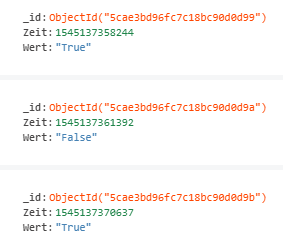

Dieser Datensatz des Sensors kann dann für weitere Analysen in den Notebooks verwendet werden.

# Automatische Befüllung der Datenbank

Wenn dieses Image in Kombination mit dem Image "Mongo-Seeder" gestartet wird, werden bereits importierte, im Image "Mongo-Seeder" vorhandene Datenkbanken importiert. Dadurch ist es nicht mehr notwendig, die Daten in diesem Image zu importieren. Damit man den Aufbau eines neuen Imports nachvollziehen kann, wurde beispielhaft im Ordner /data/db_data_export/ ein Projekt hinterlegt. Sollten weitere Imports benötigt werden, kann man sich an diesem Aufbau orientieren.